In [3]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
#uploading our data
IS=pd.read_csv('/content/IRIS.csv')

In [5]:
IS

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,NaN,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
IS.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,NaN,1.8,Iris-virginica


In [7]:
IS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  144 non-null    float64
 1   sepal_width   143 non-null    float64
 2   petal_length  142 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
IS.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,144.000000,143.000000,142.000000,150.000000
mean,5.867361,3.053846,3.819718,1.198667
std,0.830522,0.430324,1.753143,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# checkin for rows and  coloms
IS.shape


(150, 5)

In [10]:
#checking for empty entrie
IS.isnull().sum()

,0
sepal_length,6
sepal_width,7
petal_length,8
petal_width,0
species,0


In [11]:
# finding the mean of sepal_length
IS['sepal_length'].mean()

np.float64(5.867361111111111)

In [12]:
#using the mean to fill in missing values in sepal_length
IS['sepal_length'].fillna(IS['sepal_length'].mean(),inplace=True)

<ipython-input-12-6cf5af09a115>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  IS['sepal_length'].fillna(IS['sepal_length'].mean(),inplace=True)


In [13]:
# finding the mean of sepal_width
IS['sepal_width'].mean()

np.float64(3.053846153846154)

In [14]:
# using the mean to fill our missing values
IS['sepal_width'].fillna(IS['sepal_width'].mean(),inplace=True)

<ipython-input-14-84839aa7422e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  IS['sepal_width'].fillna(IS['sepal_width'].mean(),inplace=True)


In [15]:
# finding the mean of petal_length
IS['petal_length'].mean()

np.float64(3.8197183098591547)

In [16]:
# using the mean to fill petal_lenght
IS['petal_length'].fillna(IS['petal_length'].mean(),inplace=True)

<ipython-input-16-c577ec9ca7b7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  IS['petal_length'].fillna(IS['petal_length'].mean(),inplace=True)


In [17]:
# checking entries after filling empty entries
IS.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [18]:
#encoding species
le=LabelEncoder()
IS['species']=le.fit_transform(IS['species'])
IS['species']

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [19]:
# showing the different types of species
IS['species'].unique()

array([0, 1, 2])

<Axes: ylabel='count'>

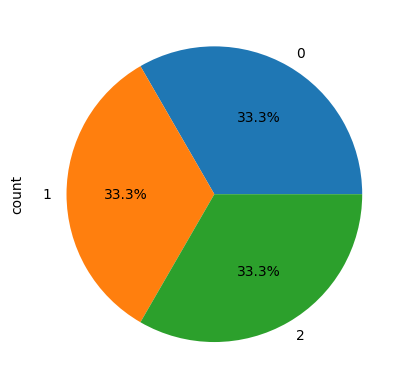

In [20]:
#visualizing the different types of species
IS['species'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [21]:
# declaring our variables for our machine learning task
x=IS[['sepal_length','sepal_width']]
y=IS['species']

In [22]:
x

,sepal_length,sepal_width
0,5.100000,3.5
1,4.900000,3.0
2,4.700000,3.2
3,5.867361,3.1
4,5.000000,3.6
...,...,...
145,6.700000,3.0
146,6.300000,2.5
147,6.500000,3.0
148,6.200000,3.4


In [23]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [24]:
#dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
len(x_train)

120

In [26]:
len(x_test)

30

In [27]:
len(y_train)

120

In [28]:
len(y_test)

30

In [29]:
x_train

,sepal_length,sepal_width
22,4.6,3.6
15,5.7,4.4
65,6.7,3.1
11,4.8,3.4
42,4.4,3.2
...,...,...
71,6.1,2.8
106,4.9,2.5
14,5.8,4.0
92,5.8,2.6


In [30]:
x_test

,sepal_length,sepal_width
73,6.100000,2.800000
18,5.700000,3.800000
118,7.700000,2.600000
78,6.000000,2.900000
76,6.800000,2.800000
31,5.400000,3.400000
64,5.600000,2.900000
141,6.900000,3.100000
68,6.200000,2.200000
82,5.800000,2.700000


In [31]:
y_test

,species
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [32]:
# Using logistics regression for machine learning
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [33]:
log.predict(x)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [34]:
# checking the accuracy of our prediction
log.score(x_test,y_test)*100

90.0